<a href="https://colab.research.google.com/github/marcolamonato/MaskCheck/blob/main/MaskCheck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Nov 19 11:10:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P8    11W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!ls

In [4]:
pip install -Uqq fastbook

     |████████████████████████████████| 727kB 18.1MB/s 
     |████████████████████████████████| 1.1MB 44.0MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
     |████████████████████████████████| 194kB 44.4MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 92kB 12.8MB/s 
     |████████████████████████████████| 40kB 7.0MB/s 
     |████████████████████████████████| 51kB 8.8MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
     |████████████████████████████████| 2.6MB 52.1MB/s 


In [5]:
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.all import *

Mounted at /content/gdrive


In [6]:
!ls

data  gdrive  sample_data


In [17]:
path=Path("/content/data")
path

Path('/content/data')

In [13]:
mask = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

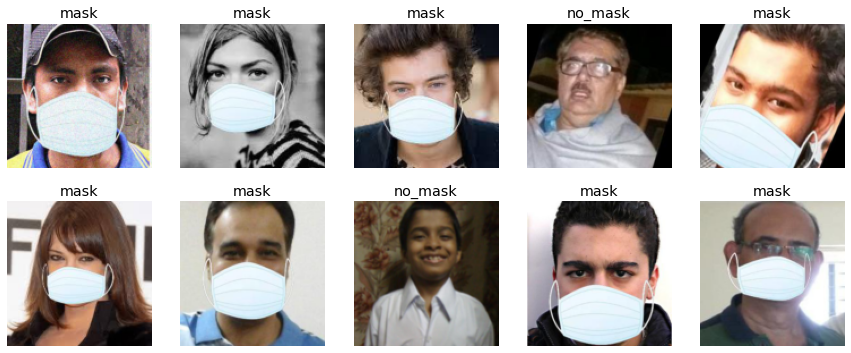

In [18]:
dls = mask.dataloaders(path)
dls.valid.show_batch(max_n=10, nrows=2)

In [19]:
mask = mask.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = mask.dataloaders(path)

In [20]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [21]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.508838,0.015582,0.004902,00:05


epoch,train_loss,valid_loss,error_rate,time
0,0.071257,0.012279,0.000000,00:05
1,0.044920,0.000060,0.000000,00:05
2,0.035116,0.000237,0.000000,00:05
3,0.026456,0.000238,0.000000,00:05


In [24]:
interp=ClassificationInterpretation.from_learner(learn)

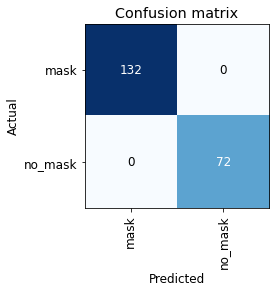

In [25]:
interp.plot_confusion_matrix()

In [22]:
learn.export("model.pkl")

In [26]:
!ls

data  gdrive  model.pkl  sample_data
